This first part of the code sets up the simulated dataset. It generates a continuous running variable (CGPA) between 2.0 and 3.5 and creates a treatment indicator based on whether the CGPA falls below a specified cutoff (2.5). It then simulates an outcome variable (exam performance) that depends on both the CGPA and the treatment, adding random noise for realism. Finally, it organizes the data into a DataFrame and computes a new variable representing the distance of each CGPA from the cutoff.

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Set the random seed for reproducibility
np.random.seed(42)

# Define sample size and the policy cutoff for CGPA
N = 500
cutoff = 2.5

# Generate a simulated running variable (CGPA) uniformly between 2.0 and 3.5
cgpa = np.random.uniform(2.0, 3.5, N)

# Create a treatment indicator:
# Assume that students with CGPA below the cutoff receive a mandatory counseling intervention (treatment = 1)
treatment = (cgpa < cutoff).astype(int)

# Simulate the outcome variable (e.g., exam performance)
# Outcome is modeled as a function of CGPA plus a treatment effect.
# Here, we assume a base exam score of 50, an effect of 10 points per unit of CGPA,
# and an additional treatment effect (e.g., a reduction of 5 points for those receiving intervention).
# A random noise term (normal with mean 0 and standard deviation 2) is added.
outcome = 50 + 10 * cgpa - 5 * treatment + np.random.normal(0, 2, N)

# Create a DataFrame to hold our simulated data
data = pd.DataFrame({
    'cgpa': cgpa,
    'treatment': treatment,
    'outcome': outcome
})

# Create a new variable: the distance of each CGPA from the cutoff.
data['running'] = data['cgpa'] - cutoff


This chunk focuses on plotting the simulated data. A scatter plot is created to display the relationship between CGPA and exam performance. The plot uses different colors to distinguish between treated and untreated observations and includes a vertical dashed line to clearly mark the CGPA cutoff (2.5).

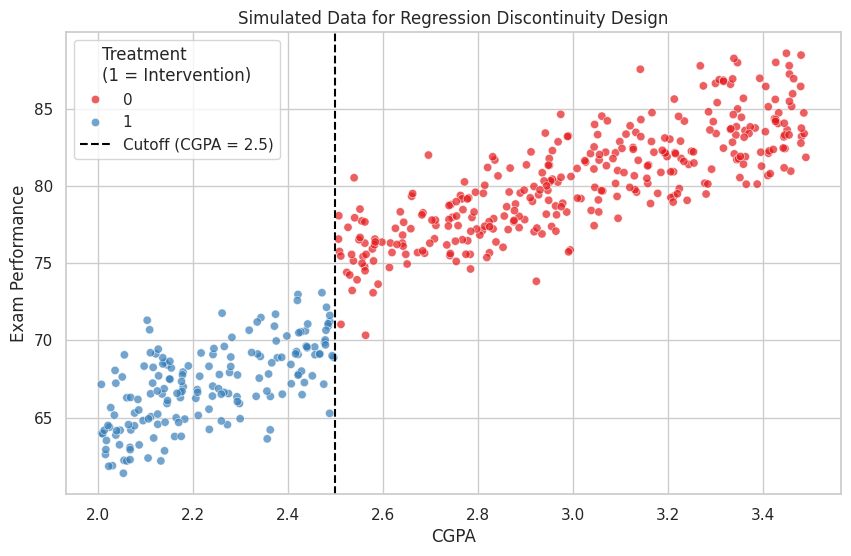

In [4]:
# Import matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style
sns.set(style="whitegrid")

# Scatter plot: Outcome vs CGPA with a vertical line at the cutoff (2.5)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='outcome', data=data, hue='treatment', palette='Set1', alpha=0.7)
plt.axvline(x=cutoff, color='black', linestyle='--', label='Cutoff (CGPA = 2.5)')
plt.title('Simulated Data for Regression Discontinuity Design')
plt.xlabel('CGPA')
plt.ylabel('Exam Performance')
plt.legend(title='Treatment\n(1 = Intervention)')
plt.show()


This section performs the core RD analysis. It sets up an Ordinary Least Squares (OLS) regression where the outcome variable is regressed on the centered running variable and the treatment indicator. This step estimates the causal impact of the treatment at the cutoff. The regression results, including coefficients and statistical significance, are then printed.

In [5]:
# Import statsmodels for regression analysis
import statsmodels.api as sm

# Define the independent variables for the regression.
# We include:
#   - A constant (intercept)
#   - The running variable (distance from cutoff)
#   - The treatment indicator
X = pd.DataFrame({
    'running': data['running'],
    'treatment': data['treatment']
})
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(data['outcome'], X).fit()

# Output the regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     2807.
Date:                Tue, 25 Feb 2025   Prob (F-statistic):          1.57e-271
Time:                        16:24:04   Log-Likelihood:                -1057.4
No. Observations:                 500   AIC:                             2121.
Df Residuals:                     497   BIC:                             2133.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.1336      0.218    344.805      0.0

In the final chunk, the code generates a predicted outcome based on the fitted regression model. A smooth curve is drawn over the range of CGPA values using a grid of values, and the fitted regression line is overlaid on the scatter plot of the original data. This visualization highlights the discontinuity at the cutoff.



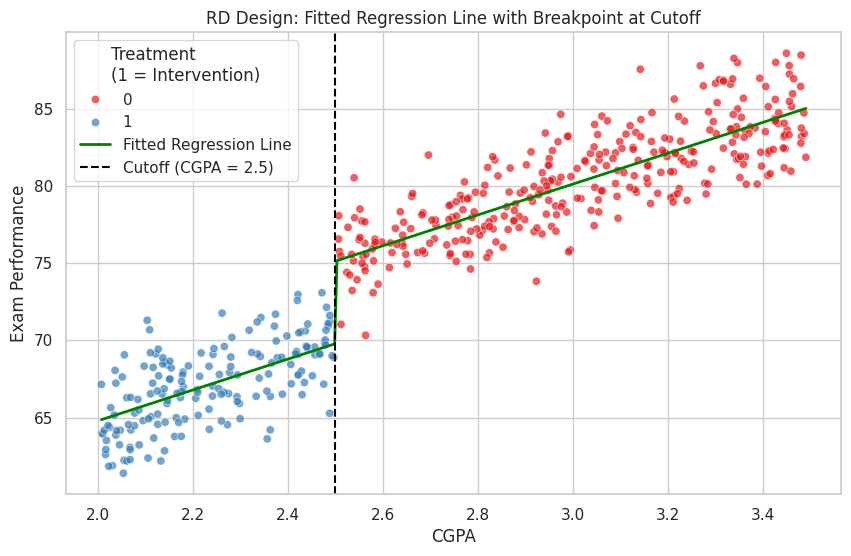

In [6]:
# Create a grid of CGPA values to plot the predicted outcomes
cgpa_grid = np.linspace(data['cgpa'].min(), data['cgpa'].max(), 300)
running_grid = cgpa_grid - cutoff
# Determine the treatment indicator based on the cutoff
treatment_grid = (cgpa_grid < cutoff).astype(int)

# Prepare the grid DataFrame for prediction
grid_df = pd.DataFrame({
    'const': 1,
    'running': running_grid,
    'treatment': treatment_grid
})

# Get the predicted outcomes using the fitted model
predicted_outcome = model.predict(grid_df)

# Plot the simulated data with the regression fit
plt.figure(figsize=(10, 6))
sns.scatterplot(x='cgpa', y='outcome', data=data, hue='treatment', palette='Set1', alpha=0.7)
plt.plot(cgpa_grid, predicted_outcome, color='green', label='Fitted Regression Line', linewidth=2)
plt.axvline(x=cutoff, color='black', linestyle='--', label='Cutoff (CGPA = 2.5)')
plt.title('RD Design: Fitted Regression Line with Breakpoint at Cutoff')
plt.xlabel('CGPA')
plt.ylabel('Exam Performance')
plt.legend(title='Treatment\n(1 = Intervention)')
plt.show()


Explanation:

Prediction Grid: A grid of CGPA values is created to calculate the predicted exam performance across the range.
Prediction Setup: The corresponding running variable and treatment indicator are computed for this grid.
Model Predictions: The fitted OLS model is used to predict outcomes along the grid.
Final Visualization: A new plot is generated showing both the original data and the predicted regression line, clearly marking the breakpoint at the cutoff. This helps to visualize the discontinuity imposed by the treatment.